In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Dell/Desktop/pythonDS/customer.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


np.int64(5268)

In [5]:
df ['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
# Removing Invalid Data

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [7]:
df = df.dropna(subset = ['CustomerID'])

In [8]:
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


np.int64(5192)

In [9]:
df = df.dropna(subset = ['CustomerID'])

In [10]:
df ['Revenue'] = df['Quantity'] * df['UnitPrice']

In [11]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [12]:
df[['Quantity', 'UnitPrice', 'Revenue', 'InvoiceMonth']].head()

,Quantity,UnitPrice,Revenue,InvoiceMonth
0,6,2.55,15.30,2010-12
1,6,3.39,20.34,2010-12
2,8,2.75,22.00,2010-12
3,6,3.39,20.34,2010-12
4,6,3.39,20.34,2010-12


In [13]:
    df['Revenue'].sum()

np.float64(8911407.904)

In [14]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending = False).head(10)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64

In [15]:
monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum()
monthly_revenue

InvoiceMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: Revenue, dtype: float64

In [16]:
import matplotlib.pyplot as plt

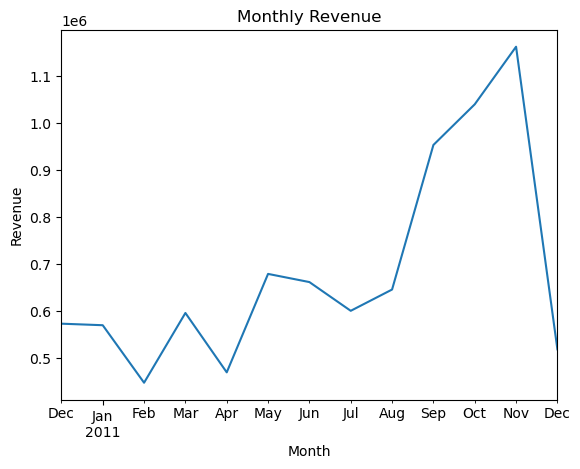

In [17]:
monthly_revenue.plot(kind = 'line')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [18]:
customer_revenue = df.groupby('CustomerID')['Revenue'].sum()
customer_revenue.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Revenue, dtype: float64

In [19]:
df['CustomerValue'] = df.groupby('CustomerID')['Revenue'].transform('sum')

In [20]:
df.loc[df['CustomerValue'] > 1000, 'Segment'] = 'High Value'

In [21]:
df[['CustomerID', 'CustomerValue', 'Segment']].head()

,CustomerID,CustomerValue,Segment
0,17850.0,5391.21,High Value
1,17850.0,5391.21,High Value
2,17850.0,5391.21,High Value
3,17850.0,5391.21,High Value
4,17850.0,5391.21,High Value


In [22]:
df_customers = df.groupby('CustomerID', as_index = False).agg({
    'CustomerValue':'sum',
    'Segment': 'first'
})

In [23]:
df_customers[df_customers['Segment'] == 'High Value'].head()

,CustomerID,CustomerValue,Segment
0,12346.0,77183.60,High Value
1,12347.0,784420.00,High Value
2,12348.0,55714.44,High Value
3,12349.0,128301.15,High Value
5,12352.0,213013.40,High Value


In [38]:
df.to_csv('Cleaned_retail_data.csv', index = False)

In [24]:
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [25]:
df_sample = df.sample(100000, random_state=42)
df_sample.to_csv("online_retail_sample.csv", index=False)